<a href="https://colab.research.google.com/github/MohammadRaziei/Deep-Learning-Course/blob/master/HW03/Q6/HW03_Q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 


## Preprocessing

load `MNIST` dataset

train.shape:  (60000, 28, 28)   ,test.shape:  (10000, 28, 28)


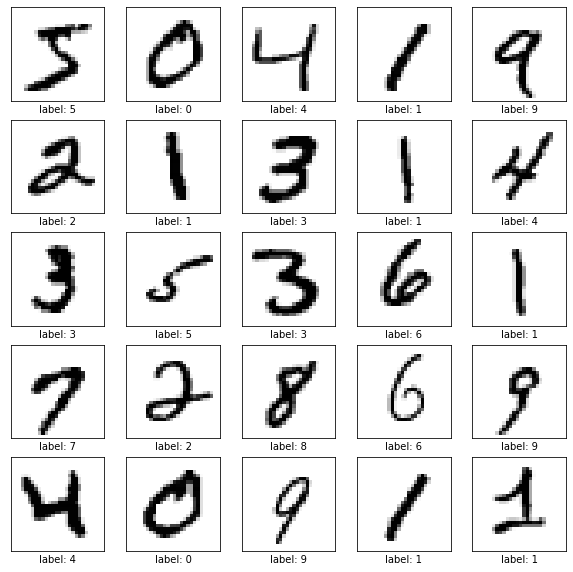

Data is loaded successfully :)


In [29]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

def plot_image(img, method=None):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)

np.random.seed(37) #dont change this line



(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('train.shape: ', x_train.shape, '  ,test.shape: ', x_test.shape)


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plot_image(x_train[i])
    plt.xlabel('label: {}'.format(y_train[i]))
plt.show()

print('Data is loaded successfully :)')

In [62]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError


## PART A

In [ ]:

data_train = x_train.reshape((x_train.shape[0],-1))/255
data_test = x_test.reshape((x_test.shape[0],-1))/255

data_dim = data_train.shape[1];

### AutoEncoder with shallow fullyConnected layer

In [19]:
# Make encoder:
encoder_input = Input(shape=(data_dim), name='Encoder_input')
encoded = Dense(60, activation="sigmoid", name='Encoded')(encoder_input)
encoder_model = Model(encoder_input, encoded, name='Encoder')

# Make decoder:
decoder_input = Input(shape=encoded.shape[1:], name='Encoder_input')
decoded  = Dense(data_dim, activation="sigmoid", name='Decoded')(decoder_input)
decoder_model = Model(decoder_input, decoded, name='Decoder')

# Make autoencoder:
ae_input = Input(shape=(data_dim), name='AutoEncoder_input')
ae_encoded = encoder_model(ae_input)
ae_decoded = decoder_model(ae_encoded)
autoencoder_model = Model(inputs=ae_input, outputs=ae_decoded, name='AutoEncoder')

autoencoder_model.compile(optimizer='adam', 
              loss=MeanSquaredError(), 
              metrics=['accuracy'])

history = autoencoder_model.fit(data_train, 
                    data_train,
                    batch_size=64,
                    epochs=20,
                    verbose=2,
                    validation_data=(data_test,data_test)
                    )


Epoch 1/20
938/938 - 2s - loss: 0.0676 - accuracy: 0.0128 - val_loss: 0.0540 - val_accuracy: 0.0181
Epoch 2/20
938/938 - 2s - loss: 0.0455 - accuracy: 0.0163 - val_loss: 0.0390 - val_accuracy: 0.0151
Epoch 3/20
938/938 - 2s - loss: 0.0352 - accuracy: 0.0131 - val_loss: 0.0313 - val_accuracy: 0.0120
Epoch 4/20
938/938 - 2s - loss: 0.0288 - accuracy: 0.0117 - val_loss: 0.0262 - val_accuracy: 0.0114
Epoch 5/20
938/938 - 2s - loss: 0.0247 - accuracy: 0.0118 - val_loss: 0.0228 - val_accuracy: 0.0114
Epoch 6/20
938/938 - 2s - loss: 0.0219 - accuracy: 0.0115 - val_loss: 0.0206 - val_accuracy: 0.0117
Epoch 7/20
938/938 - 2s - loss: 0.0202 - accuracy: 0.0113 - val_loss: 0.0191 - val_accuracy: 0.0108
Epoch 8/20
938/938 - 2s - loss: 0.0189 - accuracy: 0.0116 - val_loss: 0.0181 - val_accuracy: 0.0113
Epoch 9/20
938/938 - 2s - loss: 0.0181 - accuracy: 0.0114 - val_loss: 0.0173 - val_accuracy: 0.0111
Epoch 10/20
938/938 - 2s - loss: 0.0174 - accuracy: 0.0116 - val_loss: 0.0167 - val_accuracy: 0.0107

##### Visualization

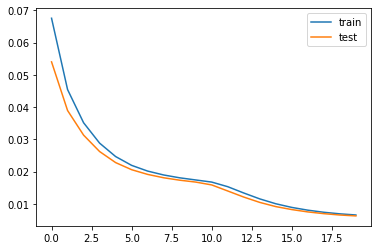

In [20]:
import matplotlib.pyplot as plt
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [21]:
# plot the autoencoder
tf.keras.utils.plot_model(encoder_model, 'shallow_encoder_model.png', show_shapes=True)
encoder_model.save('shallow_encoder.h5')
tf.keras.utils.plot_model(decoder_model, 'shallow_decoder_model.png', show_shapes=True)
encoder_model.save('shallow_decoder.h5')
tf.keras.utils.plot_model(autoencoder_model, 'shallow_autoencoder_model.png', show_shapes=True)
encoder_model.save('shallow_autoencoder.h5')

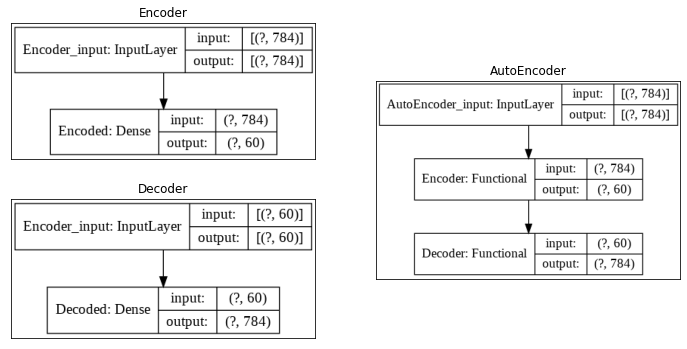

In [22]:
# plt.rcParams['figure.figsize'] = [16, 8]
plt.figure(figsize=(12,6))

# Encoder: 
plt.subplot(2,2,1)
plot_image(load_img('shallow_encoder_model.png'))
plt.title('Encoder')
# Decoder: 
plt.subplot(2,2,3)
plot_image(load_img('shallow_decoder_model.png'))
plt.title('Decoder')
# Autoencoder: 
plt.subplot2grid((2, 2), (0, 1), rowspan=2)
plot_image(load_img('shallow_autoencoder_model.png'))
plt.title('AutoEncoder')

# show
plt.show()

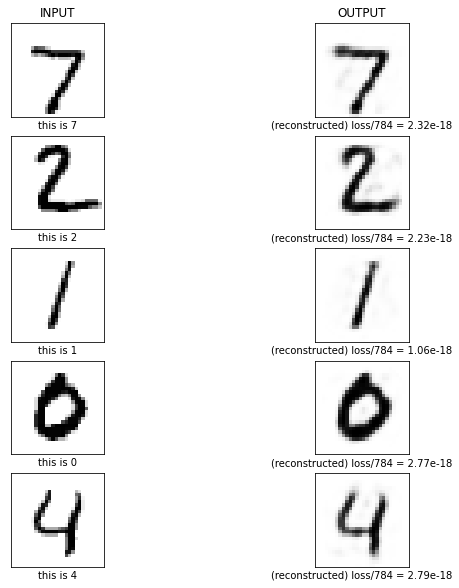

In [23]:
# make prediction on test set
data_reconst = autoencoder_model.predict(data_test).reshape(x_test.shape)
scale = x_test.shape[1]*x_test.shape[2]

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,2,2*i+1)
    if(i == 0):
      plt.title('INPUT')
    plot_image(x_test[i])
    plt.xlabel("this is {}".format(y_test[i]))

    plt.subplot(5,2,2*i+2)
    if(i == 0):
      plt.title('OUTPUT')
    plot_image(data_reconst[i])
    score, acc = autoencoder_model.evaluate(data_test[i].reshape(1, *data_test[i].shape), data_reconst[i].reshape(1,*data_test[i].shape), verbose=0)
    plt.xlabel("(reconstructed) loss/{1} = {0:0.2e}".format(score/scale, scale))
plt.show()

### AutoEncoder with deeper fullyConnected layer

In [24]:
# Make encoder:
encoder_input = Input(shape=(data_dim))
hidden = Dense(600, activation="sigmoid", name='Hidden_1')(encoder_input)
hidden = Dense(100, activation="sigmoid", name='Hidden_2')(hidden)
encoded = Dense(60, activation="sigmoid", name='Encoded')(hidden)
encoder_model = Model(encoder_input, encoded, name='Encoder')

# Make decoder:
decoder_input = Input(shape=encoded.shape[1:])
hidden = Dense(100, activation="sigmoid", name='Hidden_3')(decoder_input)
hidden = Dense(600, activation="sigmoid", name='Hidden_4')(hidden)
decoded  = Dense(data_dim, activation="sigmoid", name='Decoded')(hidden)
decoder_model = Model(decoder_input, decoded, name='Decoder')

# Make autoencoder:
ae_input = Input(shape=(data_dim))
ae_encoded = encoder_model(ae_input)
ae_decoded = decoder_model(ae_encoded)
autoencoder_model = Model(inputs=ae_input, outputs=ae_decoded)

autoencoder_model.compile(optimizer='adam', 
              loss=MeanSquaredError(), 
              metrics=['accuracy'])

history = autoencoder_model.fit(data_train, 
                    data_train,
                    batch_size=64,
                    epochs=20,
                    verbose=2,
                    validation_data=(data_test,data_test)
                    )


Epoch 1/20
938/938 - 3s - loss: 0.0612 - accuracy: 0.0098 - val_loss: 0.0519 - val_accuracy: 0.0089
Epoch 2/20
938/938 - 2s - loss: 0.0451 - accuracy: 0.0133 - val_loss: 0.0408 - val_accuracy: 0.0072
Epoch 3/20
938/938 - 2s - loss: 0.0377 - accuracy: 0.0088 - val_loss: 0.0340 - val_accuracy: 0.0112
Epoch 4/20
938/938 - 2s - loss: 0.0316 - accuracy: 0.0111 - val_loss: 0.0295 - val_accuracy: 0.0099
Epoch 5/20
938/938 - 2s - loss: 0.0286 - accuracy: 0.0133 - val_loss: 0.0274 - val_accuracy: 0.0108
Epoch 6/20
938/938 - 2s - loss: 0.0261 - accuracy: 0.0148 - val_loss: 0.0245 - val_accuracy: 0.0148
Epoch 7/20
938/938 - 2s - loss: 0.0237 - accuracy: 0.0148 - val_loss: 0.0225 - val_accuracy: 0.0145
Epoch 8/20
938/938 - 2s - loss: 0.0219 - accuracy: 0.0154 - val_loss: 0.0211 - val_accuracy: 0.0159
Epoch 9/20
938/938 - 2s - loss: 0.0207 - accuracy: 0.0159 - val_loss: 0.0202 - val_accuracy: 0.0140
Epoch 10/20
938/938 - 2s - loss: 0.0198 - accuracy: 0.0160 - val_loss: 0.0194 - val_accuracy: 0.0161

##### Visualization

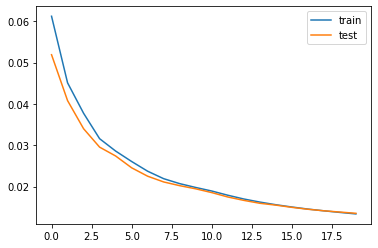

In [25]:
import matplotlib.pyplot as plt
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [26]:
# plot the autoencoder
tf.keras.utils.plot_model(encoder_model, 'deep_encoder_model.png', show_shapes=True)
encoder_model.save('deep_encoder.h5')
tf.keras.utils.plot_model(decoder_model, 'deep_decoder_model.png', show_shapes=True)
encoder_model.save('deep_decoder.h5')
tf.keras.utils.plot_model(autoencoder_model, 'deep_autoencoder_model.png', show_shapes=True)
encoder_model.save('deep_autoencoder.h5')

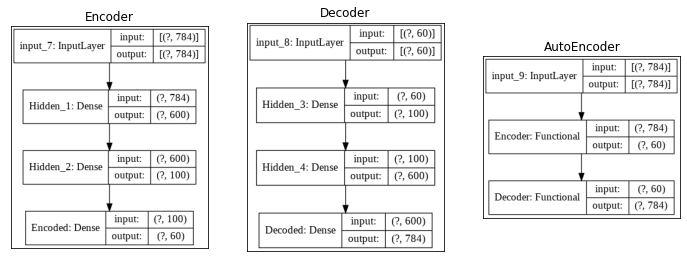

In [27]:
# plt.rcParams['figure.figsize'] = [16, 8]
plt.figure(figsize=(12,6))

# Encoder: 
plt.subplot(1,3,1)
plot_image(load_img('deep_encoder_model.png'))
plt.title('Encoder')
# Decoder: 
plt.subplot(1,3,2)
plot_image(load_img('deep_decoder_model.png'))
plt.title('Decoder')
# Autoencoder: 
plt.subplot(1,3,3)
plot_image(load_img('deep_autoencoder_model.png'))
plt.title('AutoEncoder')

# show
plt.show()

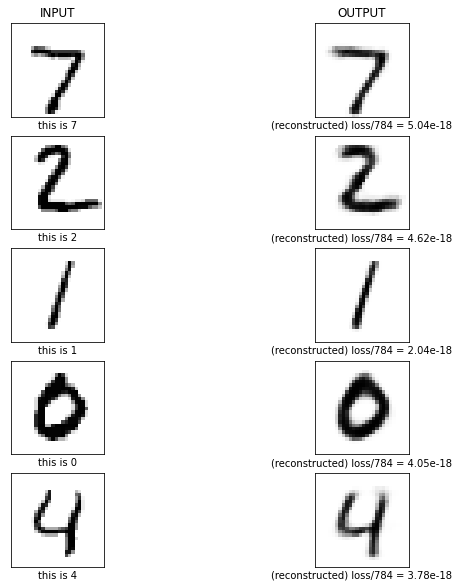

In [28]:
# make prediction on test set
data_reconst = autoencoder_model.predict(data_test).reshape(x_test.shape)
scale = x_test.shape[1]*x_test.shape[2]

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,2,2*i+1)
    if(i == 0):
      plt.title('INPUT')
    plot_image(x_test[i])
    plt.xlabel("this is {}".format(y_test[i]))

    plt.subplot(5,2,2*i+2)
    if(i == 0):
      plt.title('OUTPUT')
    plot_image(data_reconst[i])
    score, acc = autoencoder_model.evaluate(data_test[i].reshape(1, *data_test[i].shape), data_reconst[i].reshape(1,*data_test[i].shape), verbose=0)
    plt.xlabel("(reconstructed) loss/{1} = {0:0.2e}".format(score/scale, scale))
plt.show()

## PART B

In [38]:
data_train = x_train.reshape(*x_train.shape,1).astype('float32') / 255.
data_test = x_test.reshape(*x_test.shape,1).astype('float32') / 255.
data_dim = data_test.shape[1:]

### Use conv **layers**

In [87]:
# # Make encoder:
# encoder_input = Input(shape=data_dim)
# hidden = Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv1')(encoder_input)
# hidden = MaxPooling2D((2, 2), padding='same', name='MaxPool1')(hidden)
# hidden = Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv2')(hidden)
# encoded = MaxPooling2D((2, 2), padding='same', name='Encoded')(hidden)
# encoder_model = Model(encoder_input, encoded, name='Encoder')

# # Make decoder:
# decoder_input = Input(shape=encoded.shape[1:])
# decoder_conv = Conv2D(32, (3, 3), activation='relu', padding='same', name='Decode')(decoder_input)
# hidden = UpSampling2D((2, 2), name='Upsampling1')(decoder_conv)
# hidden = Conv2D(32, (3, 3), activation='relu', padding='same', name='Conv3')(hidden)
# hidden = UpSampling2D((2, 2), name='Upsampling2')(hidden)
# decoded = Conv2D(1, (3, 3), activation='sigmoid', name='Decoded')(hidden)
# decoder_model = Model(decoder_input, decoded, name='Decoder')

# # Make autoencoder:
# ae_input = Input(shape=data_dim)
# ae_encoded = encoder_model(ae_input)
# ae_decoded = decoder_model(ae_encoded)
# autoencoder_model = Model(inputs=ae_input, outputs=ae_decoded)

# autoencoder_model.compile(optimizer='adam', 
#               loss=MeanSquaredError(), 
#               metrics=['accuracy'])

# history = autoencoder_model.fit(data_train, 
#                     data_train,
#                     batch_size=64,
#                     epochs=20,
#                     verbose=2,
#                     validation_data=(data_test,data_test)
#                     )

# Make encoder:
encoder_input = keras.Input(shape=data_dim)
hidden = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
hidden = MaxPooling2D((2, 2), padding='same')(hidden)
hidden = Conv2D(32, (3, 3), activation='relu', padding='same')(hidden)
hidden = MaxPooling2D((2, 2), padding='same')(hidden)
hidden = Conv2D(8, (3, 3), activation='relu', padding='same')(hidden)
encoded = MaxPooling2D((2, 2), padding='same', name='Encoded')(hidden)
encoder_model = Model(encoder_input, encoded, name='Encoder')

# Make decoder:
decoder_input = keras.Input(shape=encoded.shape[1:]) # shape: (4, 4, 8) i.e. 128-dimensional
hidden = Conv2D(8, (3, 3), activation='relu', padding='same')(decoder_input)
hidden = UpSampling2D((2, 2))(hidden)
hidden = Conv2D(32, (3, 3), activation='relu', padding='same')(hidden)
hidden = UpSampling2D((2, 2))(hidden)
hidden = Conv2D(32, (3, 3), activation='relu')(hidden)
hidden = UpSampling2D((2, 2))(hidden)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(hidden)
decoder_model = Model(decoder_input, decoded, name='Decoder')

# Make autoencoder:
ae_input = Input(shape=data_dim)
ae_encoded = encoder_model(ae_input)
ae_decoded = decoder_model(ae_encoded)
autoencoder_model = Model(inputs=ae_input, outputs=ae_decoded)

autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder_model.fit(data_train, 
                    data_train,
                    epochs=20,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(data_test,data_test)
                    )

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1908 - val_loss: 0.1278
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1186 - val_loss: 0.1098
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1075 - val_loss: 0.1033
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1025 - val_loss: 0.1000
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0993 - val_loss: 0.0971
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0970 - val_loss: 0.0951
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0952 - val_loss: 0.0935
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0939 - val_loss: 0.0924
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0916 - val_loss: 0.0904

In [55]:
encoded.shape

TensorShape([None, 7, 7, 32])

##### Visualization

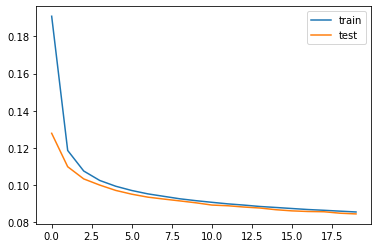

In [88]:
import matplotlib.pyplot as plt
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [89]:
# plot the autoencoder
tf.keras.utils.plot_model(encoder_model, 'conv_encoder_model.png', show_shapes=True)
encoder_model.save('conv_encoder.h5')
tf.keras.utils.plot_model(decoder_model, 'conv_decoder_model.png', show_shapes=True)
encoder_model.save('conv_decoder.h5')
tf.keras.utils.plot_model(autoencoder_model, 'conv_autoencoder_model.png', show_shapes=True)
encoder_model.save('conv_autoencoder.h5')

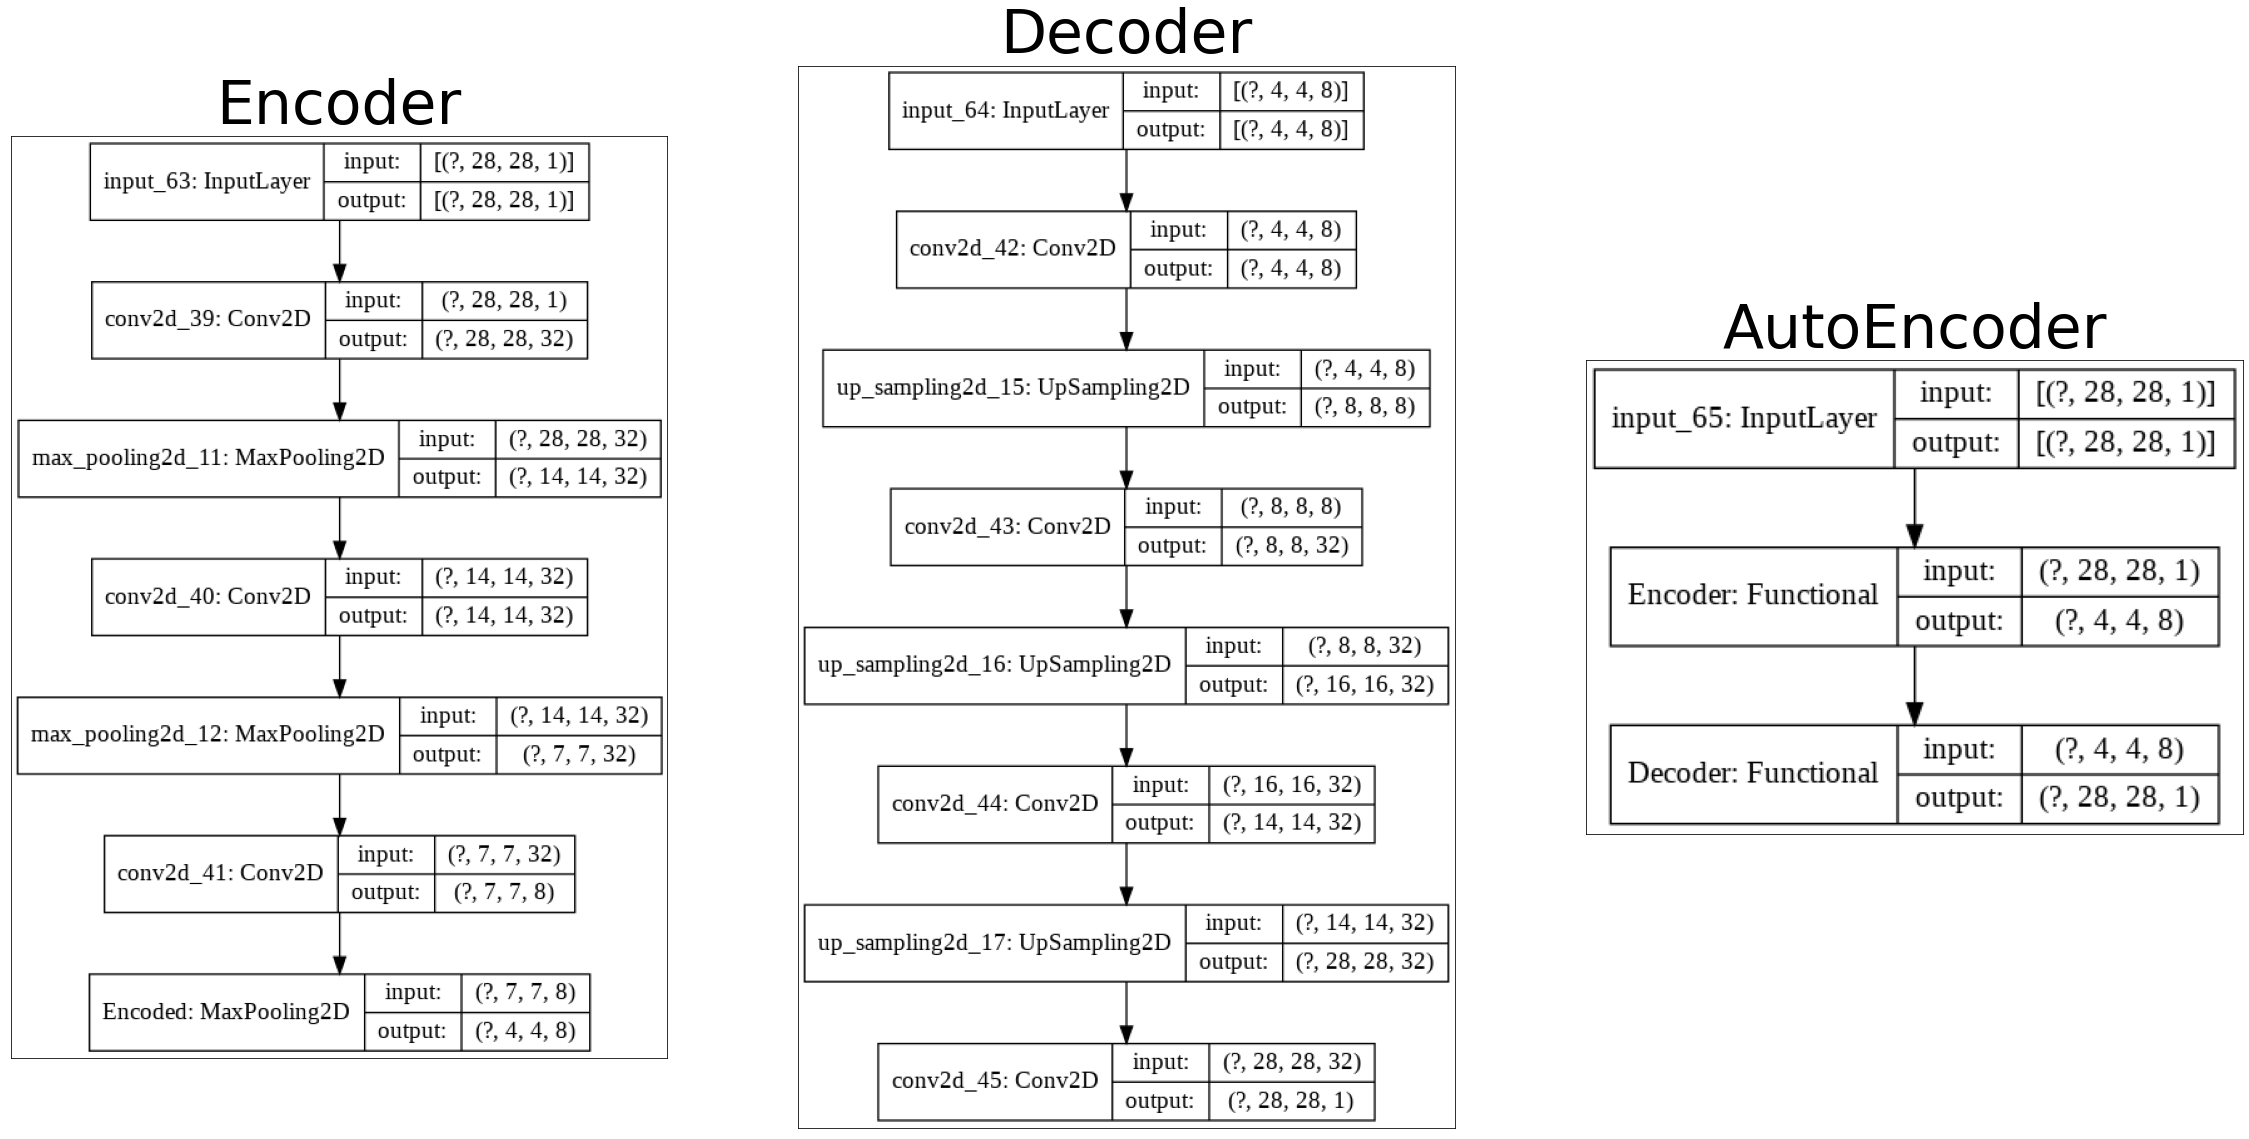

In [94]:
# plt.rcParams['figure.figsize'] = [16, 8]
plt.figure(figsize=(40,20))

# Encoder: 
plt.subplot(1,3,1)
plot_image(load_img('conv_encoder_model.png'))
plt.title('Encoder', fontdict={'fontsize':60})
# Decoder: 
plt.subplot(1,3,2)
plot_image(load_img('conv_decoder_model.png'))
plt.title('Decoder', fontdict={'fontsize':60})
# Autoencoder: 
plt.subplot(1,3,3)
plot_image(load_img('conv_autoencoder_model.png'))
plt.title('AutoEncoder', fontdict={'fontsize':60})

# show
plt.show()

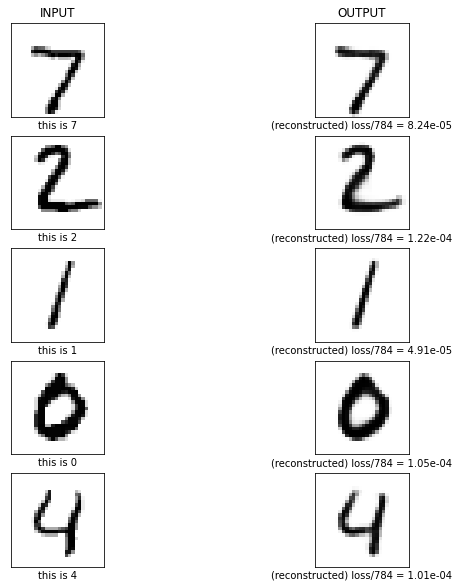

In [95]:
# make prediction on test set
data_reconst = autoencoder_model.predict(data_test).reshape(x_test.shape)
scale = x_test.shape[1]*x_test.shape[2]

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,2,2*i+1)
    if(i == 0):
      plt.title('INPUT')
    plot_image(x_test[i])
    plt.xlabel("this is {}".format(y_test[i]))

    plt.subplot(5,2,2*i+2)
    if(i == 0):
      plt.title('OUTPUT')
    plot_image(data_reconst[i])
    score = autoencoder_model.evaluate(data_test[i].reshape(1,*data_test[i].shape), data_reconst[i].reshape(1,*data_test[i].shape), verbose=0)
    plt.xlabel("(reconstructed) loss/{1} = {0:0.2e}".format(score/scale, scale))
plt.show()

> It has better results!



## Part C

In [109]:
data_train = x_train.reshape(*x_train.shape,1).astype('float32') / 255.
data_test = x_test.reshape(*x_test.shape,1).astype('float32') / 255.

noise_factor = 0.5
x_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape) 
x_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape) 

data_train_noisy = np.clip(x_train_noisy, 0., 1.)
data_test_noisy = np.clip(x_test_noisy, 0., 1.)

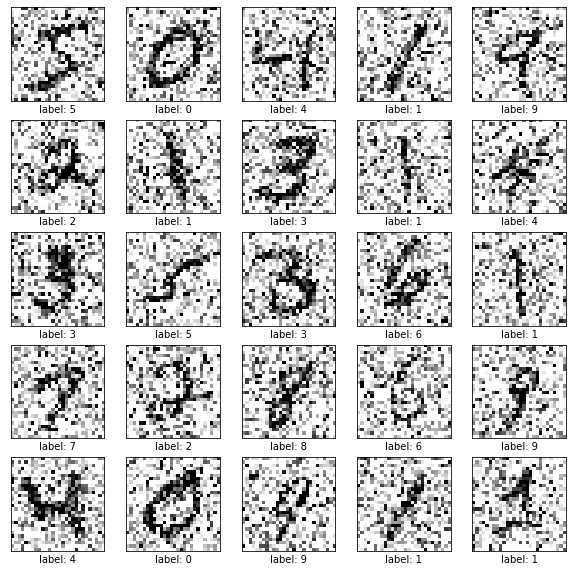

In [110]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plot_image(data_train_noisy[i].squeeze())
    plt.xlabel('label: {}'.format(y_train[i]))
plt.show()

> Too Noisy

In [111]:
history = autoencoder_model.fit(data_train_noisy, 
                    data_train,
                    epochs=20,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(data_test,data_test)
                    )

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1650 - val_loss: 1.3294
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1518 - val_loss: 1.4160
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1459 - val_loss: 1.4522
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1418 - val_loss: 1.4969
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1384 - val_loss: 1.5516
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1357 - val_loss: 1.5821
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1337 - val_loss: 1.5837
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1319 - val_loss: 1.6116
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1304 - val_loss: 1.6189
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1291 - val_loss: 1.5886

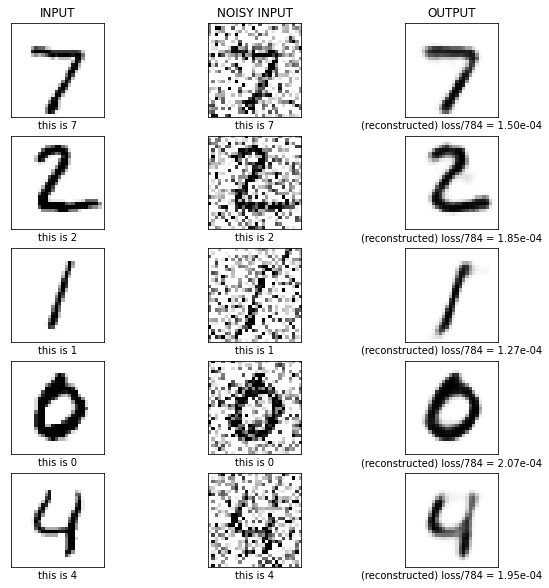

In [115]:
# make prediction on test set
data_reconst = autoencoder_model.predict(data_test_noisy).reshape(x_test.shape)
scale = x_test.shape[1]*x_test.shape[2]

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,3,3*i+1)
    if(i == 0):
      plt.title('INPUT')
    plot_image(data_test[i].reshape(x_test[i].shape))
    plt.xlabel("this is {}".format(y_test[i]))

    plt.subplot(5,3,3*i+2)
    if(i == 0):
      plt.title('NOISY INPUT')
    plot_image(data_test_noisy[i].reshape(x_test[i].shape))
    plt.xlabel("this is {}".format(y_test[i]))

    plt.subplot(5,3,3*i+3)
    if(i == 0):
      plt.title('OUTPUT')
    plot_image(data_reconst[i])
    score = autoencoder_model.evaluate(data_test[i].reshape(1,*data_test[i].shape), data_reconst[i].reshape(1,*data_test[i].shape), verbose=0)
    plt.xlabel("(reconstructed) loss/{1} = {0:0.2e}".format(score/scale, scale))
plt.show()